In [1]:
from pandas import Series, Timestamp, DataFrame
import pandas as pd
import numpy as np
import simplejson as json
import matplotlib.pyplot as plt
import spacy

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel


In [2]:
def load_jsons(data_path, file):
    """ helper function to load '.json' files (they're not proper jsons) """
    file_path = data_path + file
    with open(file_path) as jsons:
        lines = [json.loads(json_line) for json_line in jsons]
    return pd.DataFrame(lines)

In [34]:
# Load data for town called Ambridge
data_path = '../data/ambridge/'

# Seperate the files 
review_file = 'review.json'
business_file = 'business.json'


reviews = load_jsons(data_path, review_file)
businesses = load_jsons(data_path, business_file).set_index("business_id")

display(ratings)

,user_id,business_id,stars,useful,funny,cool,text,date
review_id,,,,,,,,
qb2EVdmVNvw3D0kBMN6Xrg,hXydWH25S92HjI5hmWRSyA,dJ0R-XT78LUQeNHQkD-G9g,5.0,0,0,0,Best place to get ice cream. They have only tw...,2018-08-14 04:03:02
Ecr_pKR7786kmcLVXLp5NA,vo6vLeHoPl_h-Vt-YHs9_A,Q_0eGl-aElqHKukHvmLdwA,1.0,0,0,0,"Sorry to say, Nelias did not live up to the ot...",2015-12-05 23:21:39
Ro6-JL0KCS5JULXUNRST-w,i1qyYL4fpAel8Ljt4WaZ3g,Q_0eGl-aElqHKukHvmLdwA,1.0,0,0,0,Wouldn't give it one star if I could. This pla...,2015-08-07 19:33:13
zw3oXGWKQdVjST5UI9kM3g,k2Bsnh6CV0HFX8RgGR1p9A,Q_0eGl-aElqHKukHvmLdwA,5.0,0,0,0,There is nothing fancy about this place - it i...,2013-04-13 15:58:06
E0pUvxHQZPDXTPAHoCXMiw,RBcksn2N3NaV8fcYhL67ew,Q_0eGl-aElqHKukHvmLdwA,4.0,4,0,0,I go here for the filipino food they serve whi...,2014-05-10 05:19:41
...,...,...,...,...,...,...,...,...
C_XoA4O_SivxlXus0aKawg,kiWPm6uCidjGbsolfqEkvg,xM8dVGLkYaL94EuAIkjMEA,5.0,0,0,0,I was just recently given a tour of Old Econom...,2017-06-07 18:30:48
_mw0xf5enQSEUMUAoIiLZg,voyChD-aoglG2mWMySA6Ow,xM8dVGLkYaL94EuAIkjMEA,5.0,0,0,0,I have to recommend spending the afternoon at ...,2015-11-07 22:25:16
1rYRDNCQMue4ptTfVw1NRA,8lCl40obN7k8v-wc4dAaiA,XJfvPt-8f-6d5Foaz_HYLQ,5.0,0,0,0,For years and years there was no place in Ambr...,2018-03-11 17:17:48


In [28]:
def split_data(data, d = 0.75):
    np.random.seed(seed=5)
    mask_test = np.random.rand(data.shape[0]) < d
    return data[mask_test], data[~mask_test]

reviews_training, reviews_test = split_data(reviews, d = 0.9)

In [60]:
def pivot_ratings(df):
    return df.pivot_table(values='stars', columns='user_id', index='business_id')

utility_ratings = pivot_ratings(reviews_training)
display(utitity_ratings.head())

user_id,-3uEQhR9MXaC5QTHJ4lraw,-9Y_03tqxxxaFrz5x-QZiw,00VGQdtbdvfYfxZIPniAqQ,01vXmAJKQ41PVi2wgYDiPA,0N91KZHstHSnKwJVRa2p2g,0WygCUOgOMxucwZsrYru9w,135DbbQnr3BEkQbBzZ9T1A,1gJw6DxTrf0Zmp9gDgYlrQ,1q47TqjCRH92PhXIA9t9kA,21D8GYYY-NptvXhBb9x08Q,...,wFFLWorAWh3hpxVLQP8YWw,wqrkoO4OISQ9LudoQhbdXw,wvLzHjWKwkCuEzWdTVdiGg,xA4ERJDFuPDBg-0U_G3llg,xP53fNYIx6ZNoTqSXrT5gQ,y4a_7xpbvRvCGwMNY4iRhQ,ymgPMjIYBhFoNoM8Q7wsMA,z7cR4xXpRrTV55LHDM9SBg,zgQBhM1KePf1iFphbJL3yA,zuAt2Htm1-AKs_fXuuOPcg
business_id,,,,,,,,,,,,,,,,,,,,,
-InU2nAbC9AuS-Um2Cowgw,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,5.0,NaN
0EyRe-VkW8gYxxZ7NCQXeQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2_7lYF6P2cYKnSiPhhVyPQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3gL18eXylqutlzqb6TmB0w,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN
4mpSNvmyG89Uqy2ahP4JMQ,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
display(reviews_training.head())
display(businesses.head())
display(utility_ratings.head())

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,qb2EVdmVNvw3D0kBMN6Xrg,hXydWH25S92HjI5hmWRSyA,dJ0R-XT78LUQeNHQkD-G9g,5.0,0,0,0,Best place to get ice cream. They have only tw...,2018-08-14 04:03:02
1,Ecr_pKR7786kmcLVXLp5NA,vo6vLeHoPl_h-Vt-YHs9_A,Q_0eGl-aElqHKukHvmLdwA,1.0,0,0,0,"Sorry to say, Nelias did not live up to the ot...",2015-12-05 23:21:39
2,Ro6-JL0KCS5JULXUNRST-w,i1qyYL4fpAel8Ljt4WaZ3g,Q_0eGl-aElqHKukHvmLdwA,1.0,0,0,0,Wouldn't give it one star if I could. This pla...,2015-08-07 19:33:13
4,zw3oXGWKQdVjST5UI9kM3g,k2Bsnh6CV0HFX8RgGR1p9A,Q_0eGl-aElqHKukHvmLdwA,5.0,0,0,0,There is nothing fancy about this place - it i...,2013-04-13 15:58:06
5,E0pUvxHQZPDXTPAHoCXMiw,RBcksn2N3NaV8fcYhL67ew,Q_0eGl-aElqHKukHvmLdwA,4.0,4,0,0,I go here for the filipino food they serve whi...,2014-05-10 05:19:41


,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
business_id,,,,,,,,,,,,,
dJ0R-XT78LUQeNHQkD-G9g,Ice Cream Therapy,400 Merchant St,Ambridge,PA,15003,40.584100,-80.225135,3.5,3,1,None,"Food, Ice Cream & Frozen Yogurt","{'Monday': '15:0-22:0', 'Tuesday': '15:0-22:0'..."
3gL18eXylqutlzqb6TmB0w,Action Tire Company,304 Duss Ave,Ambridge,PA,15003,40.582380,-80.223875,5.0,4,1,{'BusinessAcceptsCreditCards': 'True'},"Auto Repair, Smog Check Stations, Tires, Autom...","{'Monday': '6:30-16:0', 'Tuesday': '6:30-16:0'..."
Q_0eGl-aElqHKukHvmLdwA,Nelia's Smokehouse,603 Duss Ave,Ambridge,PA,15003,40.587939,-80.224885,4.0,18,0,"{'Alcohol': 'u'none'', 'OutdoorSeating': 'Fals...","Filipino, Food, Restaurants, Barbeque, Smokehouse","{'Monday': '11:0-19:0', 'Tuesday': '11:0-19:0'..."
Eu_zPTrNVAXkpdSxf7CJ2w,K & N Restaurant,755 Merchant St,Ambridge,PA,15003,40.588606,-80.229103,4.5,14,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Breakfast & Brunch, Restaurants, American (Tra...","{'Monday': '6:0-19:0', 'Tuesday': '6:0-19:0', ..."
Yjf0i2J9q52dYIT8UVGT3g,Heritage Floral Shoppe,663 Merchant St,Ambridge,PA,15003,40.587650,-80.228493,4.5,4,1,"{'BusinessParking': '{'garage': False, 'street...","Florists, Flowers & Gifts, Shopping","{'Monday': '9:0-16:0', 'Tuesday': '9:0-16:0', ..."


user_id,-3uEQhR9MXaC5QTHJ4lraw,-9Y_03tqxxxaFrz5x-QZiw,00VGQdtbdvfYfxZIPniAqQ,01vXmAJKQ41PVi2wgYDiPA,0N91KZHstHSnKwJVRa2p2g,0WygCUOgOMxucwZsrYru9w,135DbbQnr3BEkQbBzZ9T1A,1gJw6DxTrf0Zmp9gDgYlrQ,1q47TqjCRH92PhXIA9t9kA,21D8GYYY-NptvXhBb9x08Q,...,wFFLWorAWh3hpxVLQP8YWw,wqrkoO4OISQ9LudoQhbdXw,wvLzHjWKwkCuEzWdTVdiGg,xA4ERJDFuPDBg-0U_G3llg,xP53fNYIx6ZNoTqSXrT5gQ,y4a_7xpbvRvCGwMNY4iRhQ,ymgPMjIYBhFoNoM8Q7wsMA,z7cR4xXpRrTV55LHDM9SBg,zgQBhM1KePf1iFphbJL3yA,zuAt2Htm1-AKs_fXuuOPcg
review_id,,,,,,,,,,,,,,,,,,,,,
-YaP5MYIQcRV6svSZdHKOw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-_cVQ11Ms1nWRmZsr9f64w,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-izvD8ow0Na4XOUKliJ7zw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0-3RFQyFj9Jpl9b2GZj-yA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN
0585xvjf0ngjmhhBH7607A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,review_id,user_id,business_id,stars,useful,funny,cool,text,date,total reviews_training,total words
0,qb2EVdmVNvw3D0kBMN6Xrg,hXydWH25S92HjI5hmWRSyA,dJ0R-XT78LUQeNHQkD-G9g,5.0,0,0,0,Best place to get ice cream. They have only tw...,2018-08-14 04:03:02,0.0,79
1,Ecr_pKR7786kmcLVXLp5NA,vo6vLeHoPl_h-Vt-YHs9_A,Q_0eGl-aElqHKukHvmLdwA,1.0,0,0,0,"Sorry to say, Nelias did not live up to the ot...",2015-12-05 23:21:39,1.0,40
2,Ro6-JL0KCS5JULXUNRST-w,i1qyYL4fpAel8Ljt4WaZ3g,Q_0eGl-aElqHKukHvmLdwA,1.0,0,0,0,Wouldn't give it one star if I could. This pla...,2015-08-07 19:33:13,2.0,44
4,zw3oXGWKQdVjST5UI9kM3g,k2Bsnh6CV0HFX8RgGR1p9A,Q_0eGl-aElqHKukHvmLdwA,5.0,0,0,0,There is nothing fancy about this place - it i...,2013-04-13 15:58:06,4.0,46
5,E0pUvxHQZPDXTPAHoCXMiw,RBcksn2N3NaV8fcYhL67ew,Q_0eGl-aElqHKukHvmLdwA,4.0,4,0,0,I go here for the filipino food they serve whi...,2014-05-10 05:19:41,5.0,89
...,...,...,...,...,...,...,...,...,...,...,...
373,C_XoA4O_SivxlXus0aKawg,kiWPm6uCidjGbsolfqEkvg,xM8dVGLkYaL94EuAIkjMEA,5.0,0,0,0,I was just recently given a tour of Old Econom...,2017-06-07 18:30:48,NaN,140
374,_mw0xf5enQSEUMUAoIiLZg,voyChD-aoglG2mWMySA6Ow,xM8dVGLkYaL94EuAIkjMEA,5.0,0,0,0,I have to recommend spending the afternoon at ...,2015-11-07 22:25:16,NaN,40
376,1rYRDNCQMue4ptTfVw1NRA,8lCl40obN7k8v-wc4dAaiA,XJfvPt-8f-6d5Foaz_HYLQ,5.0,0,0,0,For years and years there was no place in Ambr...,2018-03-11 17:17:48,NaN,63
377,G6HnqzjaG3Jcb_NlfyNcbg,mLoENT0k1il695DIcPCdGA,XJfvPt-8f-6d5Foaz_HYLQ,5.0,2,0,2,Good service. Low Prices. Food was really good...,2018-05-14 12:50:38,NaN,33


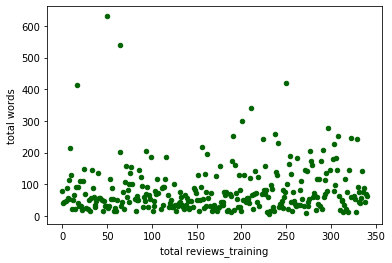

In [41]:
reviews_training['total reviews_training'] = pd.Series(list(range(len(reviews_training))))
reviews_training['total words'] = reviews_training['text'].str.split().str.len()
display(reviews_training)

graph = reviews_training.plot.scatter(x='total reviews_training', y='total words', color='Darkgreen')

# The functions below were taken and modified from bit.ly/2T8vnLe

In [42]:
tfidf = TfidfVectorizer(stop_words = "english")

#Only use reviews_training which consists of more than 50 characters
reviews_training = reviews_training[reviews_training["text"].apply(lambda x: len(x) > 50)]

reviews_training["text"] = reviews_training["text"].fillna("")

#Construct the required TF-IDF matrix by applying the fit_transform method on the overview feature
overview_matrix = tfidf.fit_transform(reviews_training["text"])

C:\Users\bdvdb\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [43]:
similarity_matrix = pd.DataFrame(linear_kernel(overview_matrix, overview_matrix))

display(similarity_matrix)

,0,1,2,3,4,5,6,7,8,9,...,330,331,332,333,334,335,336,337,338,339
0,1.000000,0.012590,0.010646,0.006148,0.025991,0.014787,0.017854,0.032830,0.039673,0.038679,...,0.005792,0.043842,0.000000,0.008577,0.021190,0.005116,0.000000,0.043591,0.059970,0.000000
1,0.012590,1.000000,0.081773,0.117516,0.118668,0.000000,0.000000,0.055196,0.007196,0.062646,...,0.108341,0.000000,0.000000,0.000000,0.022036,0.012039,0.000000,0.000000,0.000000,0.000000
2,0.010646,0.081773,1.000000,0.058198,0.046662,0.000000,0.014541,0.040952,0.006085,0.017479,...,0.090111,0.009822,0.000000,0.013812,0.024768,0.015027,0.000000,0.028848,0.021069,0.018493
3,0.006148,0.117516,0.058198,1.000000,0.214886,0.043962,0.046626,0.215409,0.019940,0.147310,...,0.063126,0.022949,0.004380,0.017042,0.099674,0.006812,0.000000,0.056553,0.109935,0.000000
4,0.025991,0.118668,0.046662,0.214886,1.000000,0.043576,0.044197,0.239374,0.037747,0.215360,...,0.019709,0.030238,0.017590,0.006925,0.030136,0.000000,0.000000,0.050667,0.081585,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,0.005116,0.012039,0.015027,0.006812,0.000000,0.039680,0.012144,0.010739,0.010792,0.003649,...,0.000000,0.034118,0.309312,0.216404,0.009301,1.000000,0.303653,0.035877,0.020250,0.218219
336,0.000000,0.000000,0.000000,0.000000,0.000000,0.054526,0.000000,0.000000,0.013389,0.000000,...,0.000000,0.062417,0.149836,0.084946,0.000000,0.303653,1.000000,0.022212,0.000000,0.058352
337,0.043591,0.000000,0.028848,0.056553,0.050667,0.088492,0.139184,0.048475,0.106664,0.052327,...,0.045507,0.106906,0.031660,0.020616,0.157254,0.035877,0.022212,1.000000,0.284940,0.043423
338,0.059970,0.000000,0.021069,0.109935,0.081585,0.000000,0.045516,0.097656,0.065196,0.073543,...,0.032609,0.078751,0.035738,0.014808,0.210968,0.020250,0.000000,0.284940,1.000000,0.000000


In [44]:
mapping = pd.Series(reviews_training.index, index = reviews_training["text"])

In [45]:
categories_dict = {}

for category in businesses["categories"].values:
    all_categories = category.split(",")
    for word in all_categories:
        categories_dict[word] = 0

In [46]:
def category_splitter(categories):
    return categories.split(",")

category_splitter("Filipino, Food, Restaurants, Barbeque, Smokehouse")

['Filipino', ' Food', ' Restaurants', ' Barbeque', ' Smokehouse']

In [47]:
"""
Functions returns a list of business ids based on similair reviews_training.
"""

def recommended_business(review, similarity_threshold, similair_categories_threshold):
    review_index = mapping[review]
    
    #get similarity values with other businesses
    #similarity_score is the list of index and similarity matrix
    similarity_score = list(enumerate(similarity_matrix[review]))

    #sort in descending order the similarity score of business put in with all the other businesses
    similarity_score = sorted(similarity_score, key = lambda x: x[1], reverse=True)
            
    # Get the scores of the similar businesses where the similarity score is above the threshold
    recommendations = []
    for score in range(len(similarity_score)):
        if similarity_score[score][1] > similarity_threshold:
            recommendations.append(similarity_score[score])

    #find ids of similair reviews_training
    review_indices = [i[0] for i in recommendations]
    similair_reviews = reviews_training["text"].iloc[review_indices].index
    
    similair_businesses, used_businesses = [], []
    
    for review_id in similair_reviews:
        business_id = reviews_training.loc[review_id]["business_id"]
        if business_id not in used_businesses:
            used_businesses.append(business_id)
            
            for test in category_splitter(businesses.loc[business_id]["categories"]):
                categories_dict[test] = categories_dict[test] + 1
                
                
            if any(value > similair_categories_threshold for value in categories_dict.values()):
                categories_dict.update((category, 0) for category in categories_dict)
            else:
                similair_businesses.append(businesses.loc[business_id]["name"])
                
    return Series(similair_businesses)

In [48]:
recommended_business(2, 0.05, 20)

0     Nelia's Smokehouse
1    Bridgetown Taphouse
2       Maple Restaurant
3     Tex-Mix Restaurant
4    Ambridge Do It Best
5              Caffe 501
6       K & N Restaurant
7        Fox's Pizza Den
dtype: object

# WERKT NIET :(

In [77]:
def predict_ratings(similarity, utility, to_predict):
    ratings_test_c = to_predict.copy()
    ratings_test_c['predicted rating'] = to_predict.apply(lambda row: predict_ids(similarity, utility, row['user_id'], row['business_id']), axis=1)
    return ratings_test_c

def predict_ids(similarity, utility, user_id, business_id):
    if user_id in utility.columns and business_id in similarity.index:
        print("SUCCES")
        return predict_vectors(utility.loc[:,user_id], similarity[business_id])
    return 0

def predict_vectors(user_ratings, similarities):
    relevant_ratings = user_ratings.dropna()
    similarities_s = similarities[relevant_ratings.index].head(30)
    similarities_s = similarities_s[similarities_s > 0.0]
    relevant_ratings = relevant_ratings[similarities_s.index]
    norm = similarities_s.sum()
    if(norm == 0):
        return 0
    return np.dot(relevant_ratings, similarities_s)/norm

predict_ratings(similarity_matrix, utility_ratings, reviews_test)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,predicted rating
3,tuDIfqFjtj5zTLjtY9W1Hg,dUOg3fS3RTYDZUpu0CqqiA,729grSa1Wsn-hfv7D5uOxg,5.0,2,0,1,Police Station Pizza has always been my favori...,2014-10-28 18:29:48,0
27,TI8k2EbfvFv5ZNLHrI9YUw,1kcOj0Ch394fLiUaC_fD9g,Q_0eGl-aElqHKukHvmLdwA,5.0,1,0,0,Unreal. \n\nFriendly people work here. I got c...,2016-06-28 16:58:31,0
28,g3LXua2ddIsEAMom12G5HA,LIHlbBXL5LsOyNpQVAU3lg,Eu_zPTrNVAXkpdSxf7CJ2w,5.0,2,1,1,Great breakfast and lunches! Their crepes and ...,2014-09-15 15:40:26,0
39,AuvyCCQkSL-8M8ieXDNujA,sNtu3HsJ7_2nXRBz-3_dIA,Eu_zPTrNVAXkpdSxf7CJ2w,5.0,0,0,0,Just went here for the first time and the food...,2017-12-10 19:10:35,0
43,5tc63_UMngf6NVfZ4gzeFA,xBK-ElArbwMaonFFAI4NAA,Yjf0i2J9q52dYIT8UVGT3g,5.0,0,0,0,They couldn't have been nicer on the phone and...,2016-08-11 16:46:39,0
46,bsTkvsdFoGAqijFtX3naJQ,91_o14HnvQlCqe8XSHadxQ,729grSa1Wsn-hfv7D5uOxg,5.0,0,0,0,Best pizza in the beaver county area ... I dro...,2017-05-07 14:31:29,0
56,XndPoSWMEctVS-OL1zSCTA,6Ki3bAL0wx9ymbdJqbSWMA,729grSa1Wsn-hfv7D5uOxg,5.0,3,1,2,"As a native of Aliquippa, I've grown up on Bre...",2016-11-03 12:33:21,0
62,gOfLiewzlKyEdw63UNJwoA,REJ4ZVhUKUsyxBAveg70zA,729grSa1Wsn-hfv7D5uOxg,3.0,3,0,0,Had to try this. Well school cafeteria is wha...,2015-07-14 10:32:58,0
63,UAf4dxXzcAvoFXr_V1--7w,3xQ9B-tv3D_fCnKRwt0c2w,729grSa1Wsn-hfv7D5uOxg,5.0,1,0,0,An original. A true classic. Crunch of the cru...,2015-02-24 02:46:42,0
79,ZoqadRQDL8STHEV_PNwAng,ANOuJtkXx3jkRcqDQ_80Tg,729grSa1Wsn-hfv7D5uOxg,5.0,0,0,0,Best pizza around by far i go here as much as ...,2017-05-13 01:19:52,0
